In [1]:
import numpy as np
import pandas as pd

get data

In [2]:
data = pd.read_csv('cybersecurity_attacks.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [3]:
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [4]:
data.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Data Preprocessing

In [5]:
data.drop(
    [
        'Timestamp',
        'Proxy Information',
        'Firewall Logs',
        'Payload Data',
        'Device Information'
    ],
    axis=1,inplace=True
)

In [6]:
data.isnull().sum()

Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Network Segment               0
Geo-location Data             0
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [7]:
data['Malware Indicators'].fillna('Not Detected',inplace=True)
data['Alerts/Warnings'].fillna('No Alets',inplace=True)
data['IDS/IPS Alerts'].fillna('No Alets',inplace=True)

/tmp/ipykernel_6875/1409856550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Malware Indicators'].fillna('Not Detected',inplace=True)
/tmp/ipykernel_6875/1409856550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [8]:
data.isnull().sum()

Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [9]:
pd.unique(data['Attack Type'])

array(['Malware', 'DDoS', 'Intrusion'], dtype=object)

In [10]:
data.groupby("Attack Type")["Attack Type"].count().sort_values(ascending=False)

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: Attack Type, dtype: int64

Visualisasi Data

Text(0, 0.5, 'Count')

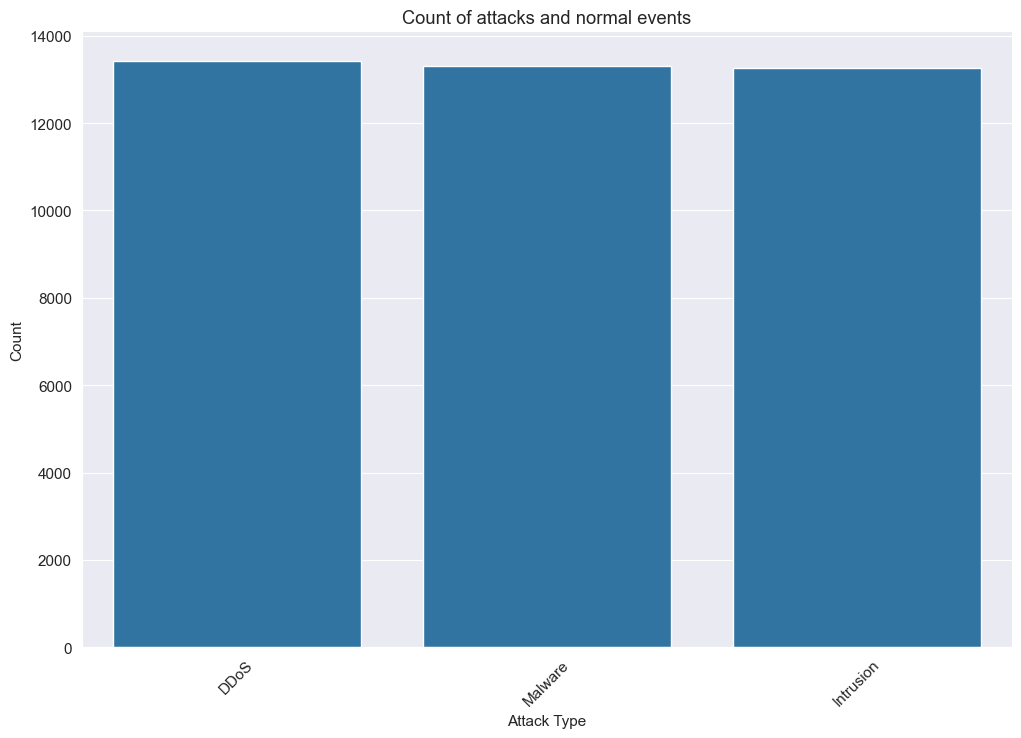

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)

font = {"size" : 11}
plt.rc('font',**font)

grouped_label = data.groupby("Attack Type")["Attack Type"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_label.index, y=grouped_label.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

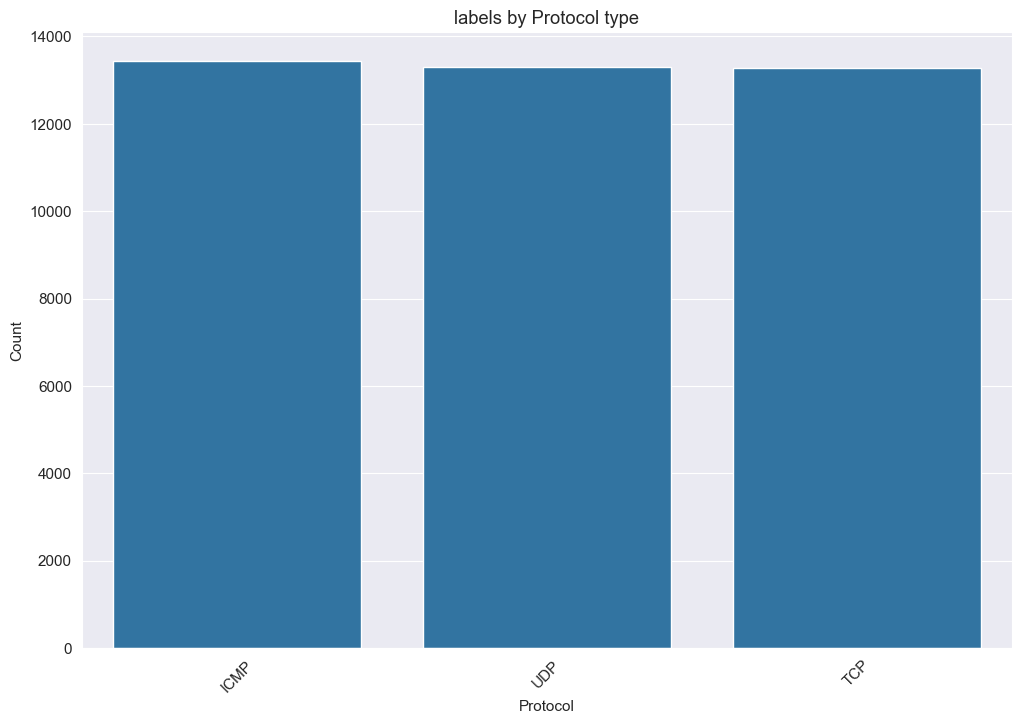

In [12]:
grouped_labels = data.groupby("Protocol")["Protocol"].count().sort_values(ascending=False)
plt.xticks(rotation=45)

sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("labels by Protocol type")
plt.ylabel("Count")

Text(0.5, 1.0, 'Class balance')

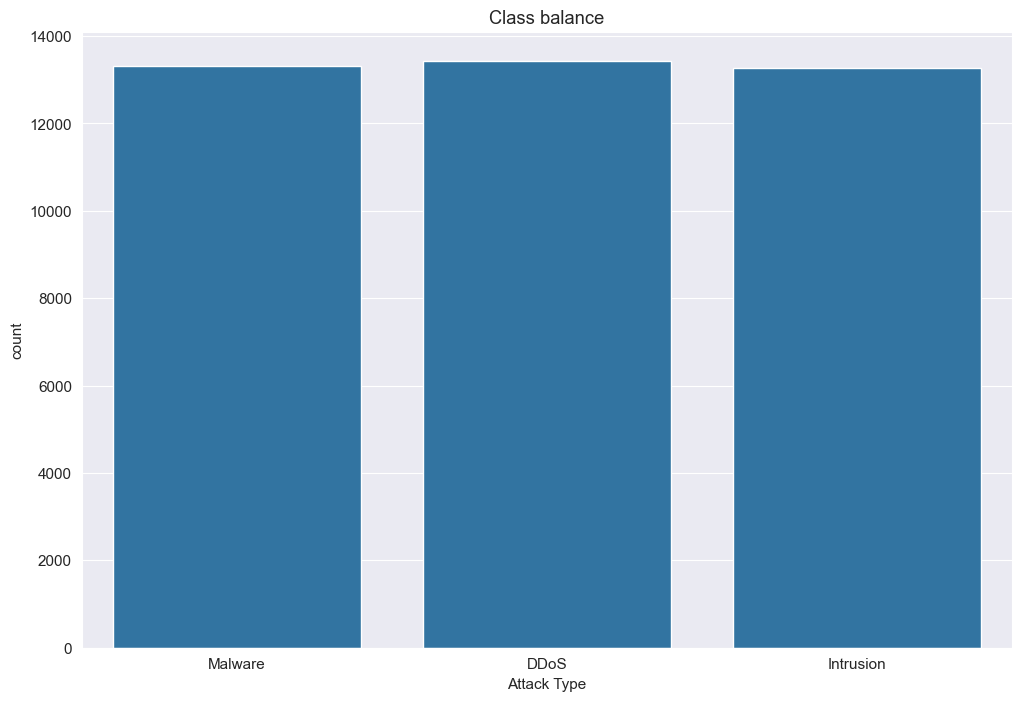

In [13]:
sns.countplot(x="Attack Type", data=data)
plt.title("Class balance")

mencari korelasi data

berdasarkan nilai anomaly scores

Text(0.5, 1.0, 'Number of connections to the same host as the current connection in the past two seconds ')

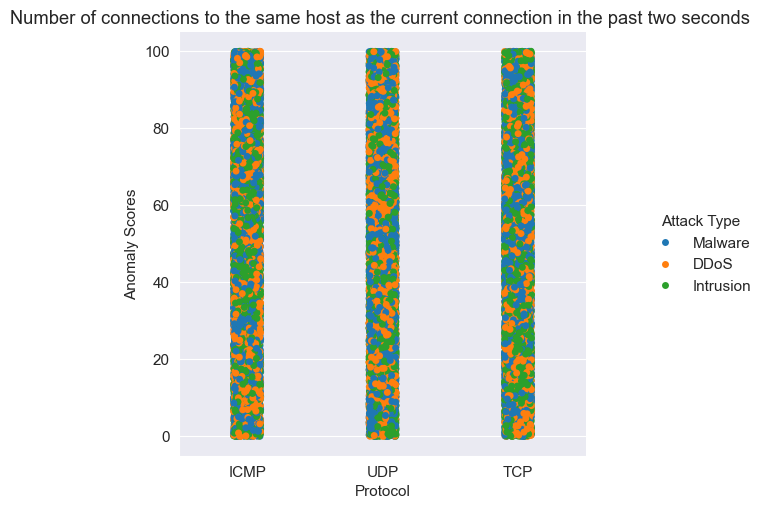

In [14]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Attack Type", data=data)
plt.title("Number of connections to the same host as the current connection in the past two seconds ")

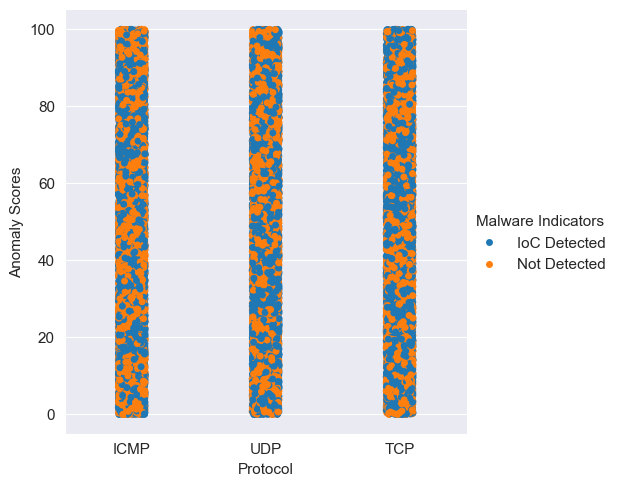

In [15]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Malware Indicators", data=data)

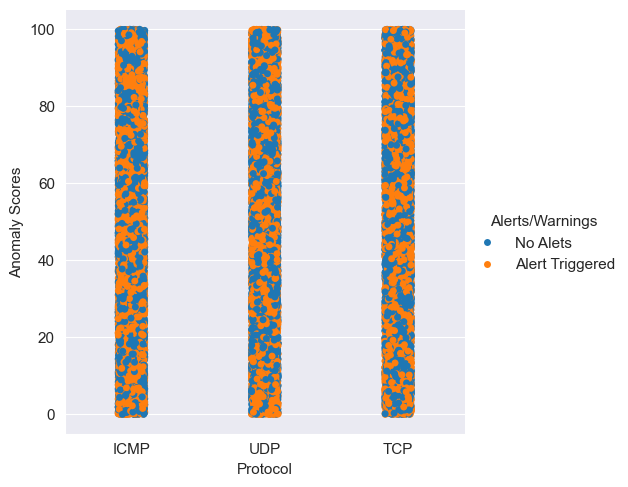

In [16]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Alerts/Warnings", data=data)

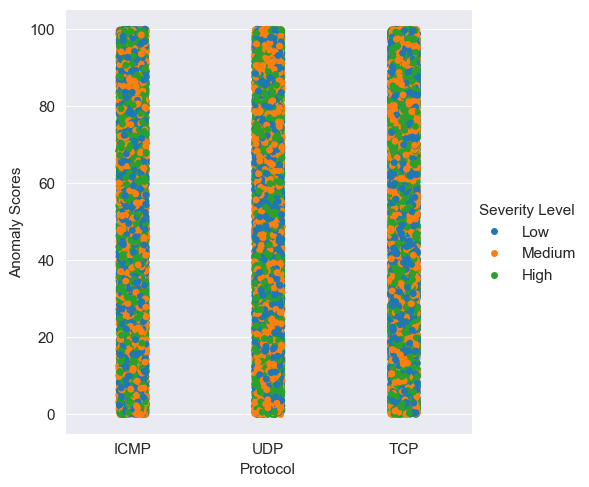

In [17]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Severity Level", data=data)

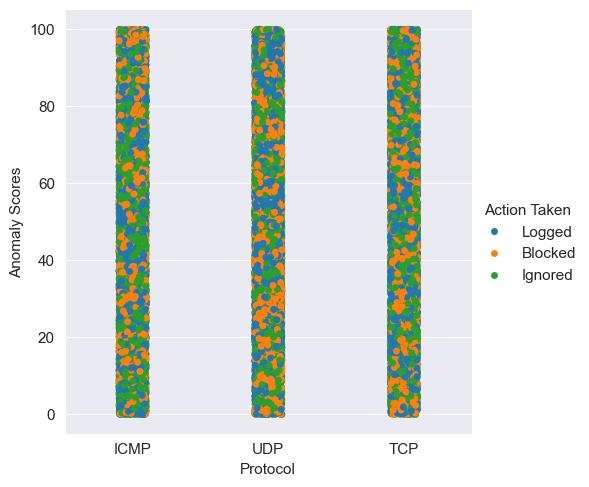

In [18]:
sns.catplot(x="Protocol", y="Anomaly Scores", hue="Action Taken", data=data)

splitting dataset

In [19]:
y = [0 if i == "Intrusion" else 1 for i in data['Attack Type']]
X = data.drop("Attack Type",axis=1)

In [20]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


In [21]:
from statistics import mean
mean(y)

0.668375

In [22]:
from sklearn.model_selection import train_test_split

# enc_protocol = pd.get_dummies(data["Protocol"],prefix="protocols_")
# enc_packet = pd.get_dummies(data["Packet Type"],prefix="packets_")
# enc_severity = pd.get_dummies(data["Severity Level"],prefix="severitys_")

enc_malware = pd.get_dummies(data['Malware Indicators'],prefix="malwares_")
enc_alert = pd.get_dummies(data['Alerts/Warnings'],prefix="alerts_")
enc_action = pd.get_dummies(data['Action Taken'],prefix="actions_")
enc_signature = pd.get_dummies(data['Attack Signature'],prefix="signatures_")
enc_idsAlert = pd.get_dummies(data['IDS/IPS Alerts'],prefix="idsalerts_")

X = pd.concat([X,enc_malware,enc_alert,enc_action,enc_signature,enc_idsAlert],axis=1)
X.drop("Protocol",axis=1, inplace=True)
X.drop("Packet Type",axis=1, inplace=True)
X.drop("Severity Level",axis=1, inplace=True)
X.drop("Source IP Address",axis=1, inplace=True)
X.drop("Destination IP Address",axis=1, inplace=True)
X.drop("Source Port",axis=1, inplace=True)
X.drop("Destination Port",axis=1, inplace=True)
X.drop("Traffic Type",axis=1, inplace=True)
X.drop("Malware Indicators",axis=1, inplace=True)
X.drop("Alerts/Warnings",axis=1, inplace=True)
X.drop("Attack Signature",axis=1, inplace=True)
X.drop("Action Taken",axis=1, inplace=True)
X.drop("User Information",axis=1, inplace=True)
X.drop("Network Segment",axis=1, inplace=True)
X.drop("Geo-location Data",axis=1, inplace=True)
X.drop("Log Source",axis=1, inplace=True)
X.drop("IDS/IPS Alerts",axis=1, inplace=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [23]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Packet Length                40000 non-null  int64  
 1   Anomaly Scores               40000 non-null  float64
 2   malwares__IoC Detected       40000 non-null  bool   
 3   malwares__Not Detected       40000 non-null  bool   
 4   alerts__Alert Triggered      40000 non-null  bool   
 5   alerts__No Alets             40000 non-null  bool   
 6   actions__Blocked             40000 non-null  bool   
 7   actions__Ignored             40000 non-null  bool   
 8   actions__Logged              40000 non-null  bool   
 9   signatures__Known Pattern A  40000 non-null  bool   
 10  signatures__Known Pattern B  40000 non-null  bool   
 11  idsalerts__Alert Data        40000 non-null  bool   
 12  idsalerts__No Alets          40000 non-null  bool   
dtypes: bool(11), flo

apply algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

# random forest
modelrf = RandomForestClassifier(bootstrap=True,random_state=5,criterion="gini")
modelrf.fit(X_train,y_train)

y_rf = modelrf.predict(X_test)

# bagging
modelbg = BaggingClassifier()
modelbg.fit(X_train,y_train)

y_bg = modelbg.predict(X_test)

# logistic regression
modellr = LogisticRegression(random_state=5,solver="liblinear",penalty="l1",intercept_scaling=1)
modellr.fit(X_train,y_train)

y_lr = modellr.predict(X_test)

confusion_matrix

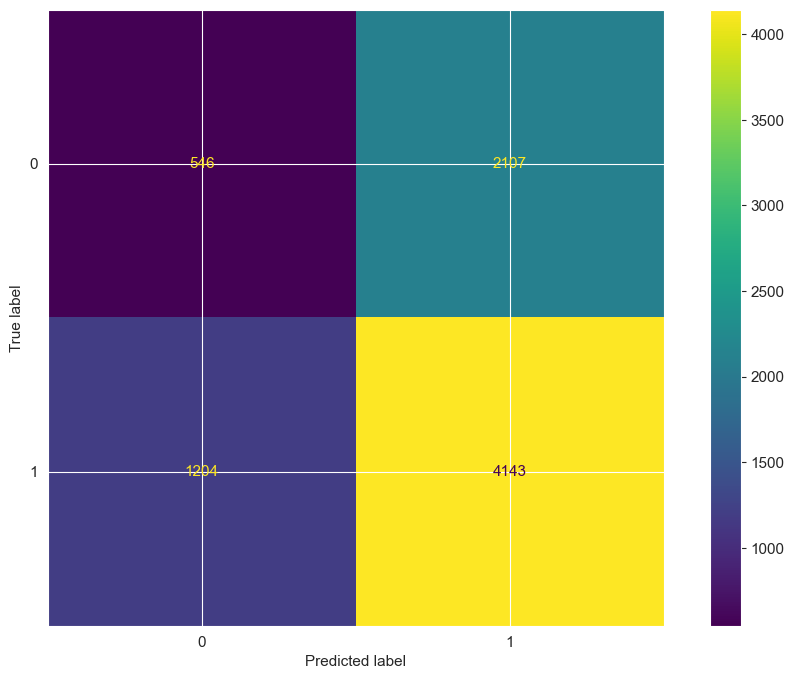

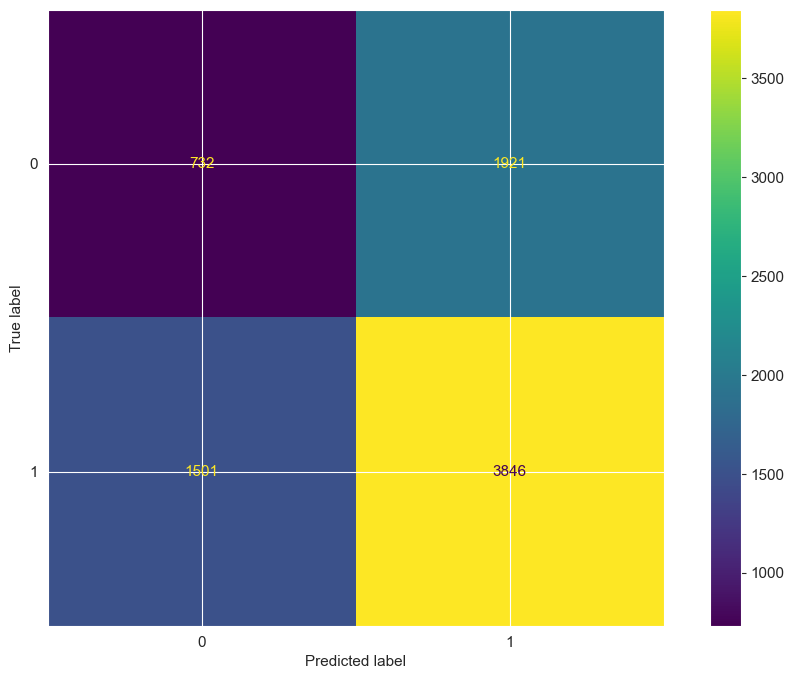

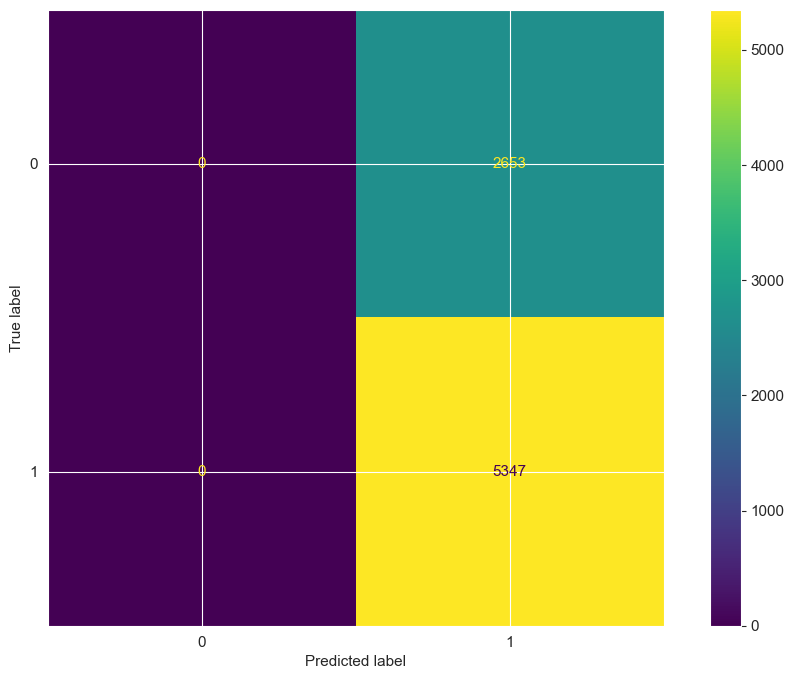

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# Random Forest
cmrf = confusion_matrix(y_test, y_rf)
disprf = ConfusionMatrixDisplay(confusion_matrix=cmrf)
disprf.plot()

# Bagging
cmbg = confusion_matrix(y_test,y_bg)
dispbg = ConfusionMatrixDisplay(confusion_matrix=cmbg)
dispbg.plot()

# Logistic Regression
cmlr = confusion_matrix(y_test, y_lr)
displr = ConfusionMatrixDisplay(confusion_matrix=cmlr)
displr.plot()

In [26]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi performa model Random Forest
rf_accuracy = accuracy_score(y_test, y_rf)
rf_classification_report = classification_report(y_test, y_rf)

# Evaluasi performa model Bagging
bg_accuracy = accuracy_score(y_test, y_bg)
bg_classification_report = classification_report(y_test, y_bg)

# Evaluasi performa model Logistic Regression
lr_accuracy = accuracy_score(y_test, y_lr)
lr_classification_report = classification_report(y_test, y_lr)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_classification_report)

print("Bagging Accuracy:", bg_accuracy)
print("Bagging Classification Report:\n", bg_classification_report)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_classification_report)

Random Forest Accuracy: 0.586125
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.21      0.25      2653
           1       0.66      0.77      0.71      5347

    accuracy                           0.59      8000
   macro avg       0.49      0.49      0.48      8000
weighted avg       0.55      0.59      0.56      8000

Bagging Accuracy: 0.57225
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.28      0.30      2653
           1       0.67      0.72      0.69      5347

    accuracy                           0.57      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.55      0.57      0.56      8000

Logistic Regression Accuracy: 0.668375
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2653
           1       0.67  

/home/rikza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rikza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rikza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
